In [7]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [8]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

In [9]:
def hot1Encode(S):
    encoded = []
    dct_bases = {'A': [1, 0, 0, 0], 'T': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'C': [0, 0, 0, 1]}
    for b in S:
        encoded.extend(dct_bases[b])
    return encoded

In [10]:
df = pd.read_csv('/home/jardic/Documents/projects/jk/aurora_secstruct_small/datasets/datasets_prepped/strc_km.csv', usecols=['varseq', 'cpm'])

In [ ]:
df.head()

In [ ]:
# Select random 1/10 of sequences for training and a different 1/10 for testing

index = df.index.tolist()
trn_idxs = np.random.choice(index, size=int(len(df) / 10))
index = list(set(index) - set(trn_idxs))
tst_idxs = np.random.choice(index, size=int(len(df) / 10))

# Save the train and test indexes
splits = {'trn':trn_idxs, 'tst':tst_idxs}

with open('splits.pkl', mode='wb') as sf:
    pkl.dump(splits, sf)

In [11]:
# Use this to load splits, for reproducibility
with open('splits.pkl', mode='rb') as sf:
    splits = pkl.load(sf)

In [12]:
# Use splits indexes to make X_trn, y_trn, X_tst, y_tst
df_trn = df.loc[splits['trn']]
df_tst = df.loc[splits['tst']]

X_trn = np.array([hot1Encode(s) for s in df_trn['varseq']])
y_trn = df_trn['cpm']
X_tst = np.array([hot1Encode(s) for s in df_tst['varseq']])
y_tst = df_tst['cpm']

In [13]:
# Train a simple MLP on the random split

model = MLPRegressor(random_state=1,
         hidden_layer_sizes=(100, 100, 100, 100),
         activation='relu',
         batch_size=100,
         learning_rate_init=0.0001,
         early_stopping=True,
         validation_fraction=0.1,
        max_iter=40,
        learning_rate='constant',
        verbose=True)

In [14]:
model.fit(X_trn, y_trn)

Iteration 1, loss = 0.84569788
Validation score: 0.252344
Iteration 2, loss = 0.68810152
Validation score: 0.389108
Iteration 3, loss = 0.57794448
Validation score: 0.526388
Iteration 4, loss = 0.49058059
Validation score: 0.469907
Iteration 5, loss = 0.41750262
Validation score: 0.557569
Iteration 6, loss = 0.37443901
Validation score: 0.627244
Iteration 7, loss = 0.33881681
Validation score: 0.687065
Iteration 8, loss = 0.28314453
Validation score: 0.722219
Iteration 9, loss = 0.23981994
Validation score: 0.751288
Iteration 10, loss = 0.22662259
Validation score: 0.691879
Iteration 11, loss = 0.21119611
Validation score: 0.682871
Iteration 12, loss = 0.20997311
Validation score: 0.738151
Iteration 13, loss = 0.16845690
Validation score: 0.705687
Iteration 14, loss = 0.14005845
Validation score: 0.765439
Iteration 15, loss = 0.13689081
Validation score: 0.746616
Iteration 16, loss = 0.14151745
Validation score: 0.659718
Iteration 17, loss = 0.12549439
Validation score: 0.828658
Iterat

/home/jardic/miniconda3/envs/ae_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=100, early_stopping=True,
             hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.0001,
             max_iter=40, random_state=1, verbose=True)

In [15]:
predictions = model.predict(X_tst)

In [16]:
max(predictions)

np.float64(275.30120409407095)

In [17]:
max(y_tst)

422.9160591293844

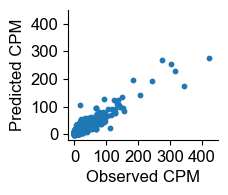

In [23]:
# Define absolute axis size in inches
axis_width = 1.5  # Width in inches
axis_height = 1.3  # Height in inches

# Define margins
left_margin = 0.5
bottom_margin = 0.5

# Compute figure size to ensure fixed axis size
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5

fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place the axes (left, bottom, width, height) in figure coordinates (0-1 range)
ax = fig.add_axes([
    left_margin / fig_width,
    bottom_margin / fig_height,
    axis_width / fig_width,
    axis_height / fig_height
])

# Plot
plt.scatter(y_tst, predictions, alpha=1, c='#1f77b4ff', rasterized=True, s=10)

ax.set_xlim(-20, 450)
ax.set_ylim(-20, 450)

plt.xticks([0, 100, 200, 300, 400])
plt.yticks([0, 100, 200, 300, 400])


plt.xlabel('Observed CPM')
plt.ylabel('Predicted CPM')

sns.despine()
#plt.show()
plt.savefig('observed_predicted_s8_0p1.svg', dpi=300)
plt.savefig('observed_predicted_s8_0p1.pdf', dpi=300)